# Jupyter notebook sample

In [50]:
# Import libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# from scipy.stats import norm
# from sklearn.linear_model import LinearRegression
import numpy as np

import seaborn as sns

# Reading Data

In [2]:
pd.options.mode.copy_on_write = True


## Description of Dataset1
Features:
longitude: A measure of how far west a house is; a higher value is farther west
latitude: A measure of how far north a house is; a higher value is farther north
housingMedianAge: Median age of a house within a block; a lower number is a newer building
totalRooms: Total number of rooms within a block
totalBedrooms: Total number of bedrooms within a block
population: Total number of people residing within a block
households: Total number of households, a group of people residing within a home unit, for a block
medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
medianHouseValue: Median house value for households within a block (measured in US Dollars)
oceanProximity: Location of the house w.r.t ocean/sea

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.




In [8]:
housing1 = pd.read_csv(file1)
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing1.shape


(20640, 10)

In [10]:
housing2 = pd.read_csv(file2)
housing2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Description of Dataset3

Sales Statistics for Existing Single Family Homes
The County sales data in the tables below are generated from a survey of more than 90 associations of REALTORS® throughout the state, and represent statistics of existing single-family homes. Sample data has been refined and modified recently to increase accuracy of the statistics; historical numbers have been revised to reflect the change of the sample. County sales data are not adjusted to account for seasonal factors that can influence home sales. Please click below to view the corresponding sales statistics.

Median house prices of different cities in southern california




In [11]:
housing3 = pd.read_csv(file3)
housing3.head()

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,...,Yuba,Unnamed: 55,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,Jan-90,"$194,952","$226,149",NaN,"$102,143",NaN,NaN,NaN,NaN,"$82,083",...,NaN,NaN,"$141,519","$203,390",NaN,NaN,NaN,NaN,"$227,366",NaN
1,Feb-90,"$196,273","$219,306",NaN,"$83,333",NaN,NaN,NaN,NaN,"$87,187",...,NaN,NaN,"$144,965","$211,024",NaN,NaN,NaN,NaN,"$234,739",NaN
2,Mar-90,"$194,856","$225,162",NaN,"$100,000",NaN,NaN,NaN,NaN,"$83,889",...,NaN,NaN,"$141,132","$209,286",NaN,NaN,NaN,NaN,"$235,337",NaN
3,Apr-90,"$196,111","$229,333",NaN,"$108,000",NaN,NaN,NaN,NaN,"$85,428",...,NaN,NaN,"$145,707","$210,302",NaN,NaN,NaN,NaN,"$233,178",NaN
4,May-90,"$195,281","$232,291",NaN,"$100,000",NaN,NaN,NaN,NaN,"$88,749",...,NaN,NaN,"$146,060","$210,148",NaN,NaN,NaN,NaN,"$235,881",NaN


### Clean Data
Convert Data from strings to int and float values that can be used by df for visualization
Year needs to be converted from string to proper data time format
Prices needs to be converted to floats , since there are multiple columns that need to be converted we need
to go through each one and convert to floats all at once ;

need to convert any NAN to  0


In [14]:
import numpy as np

housing3["Mon-Yr"] = pd.to_datetime(housing3["Mon-Yr"],  format='%b-%y')

cols = housing3.columns.drop("Mon-Yr")

housing3[cols] = (
    housing3[cols]
    .replace({r'\$': '', ',': '', '--': '', '—': '', 'N/A': '', 'null': ''}, regex=True)
    .replace('', np.nan)
    .astype(float)
)

housing3.fillna(0, inplace=True)

# housing3['CA'] = housing3['CA'].replace({'$'}, regex=True).astype(float)

In [15]:
housing3.isna().sum()

Mon-Yr            0
CA                0
Alameda           0
Amador            0
Butte             0
                 ..
Central Valley    0
Far North         0
Inland Empire     0
S.F. Bay Area     0
SoCal             0
Length: 64, dtype: int64

In [16]:
housing3.head()

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,...,Yuba,Unnamed: 55,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,1990-01-01,194952.0,226149.0,0.0,102143.0,0.0,0.0,0.0,0.0,82083.0,...,0.0,0.0,141519.0,203390.0,0.0,0.0,0.0,0.0,227366.0,0.0
1,1990-02-01,196273.0,219306.0,0.0,83333.0,0.0,0.0,0.0,0.0,87187.0,...,0.0,0.0,144965.0,211024.0,0.0,0.0,0.0,0.0,234739.0,0.0
2,1990-03-01,194856.0,225162.0,0.0,100000.0,0.0,0.0,0.0,0.0,83889.0,...,0.0,0.0,141132.0,209286.0,0.0,0.0,0.0,0.0,235337.0,0.0
3,1990-04-01,196111.0,229333.0,0.0,108000.0,0.0,0.0,0.0,0.0,85428.0,...,0.0,0.0,145707.0,210302.0,0.0,0.0,0.0,0.0,233178.0,0.0
4,1990-05-01,195281.0,232291.0,0.0,100000.0,0.0,0.0,0.0,0.0,88749.0,...,0.0,0.0,146060.0,210148.0,0.0,0.0,0.0,0.0,235881.0,0.0


In [17]:
housing3.shape

(429, 64)

In [18]:
housing3.columns

Index(['Mon-Yr', 'CA', 'Alameda', 'Amador', 'Butte', 'Calaveras',
       'Contra-Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera',
       'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa',
       'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Diego', 'San Francisco',
       'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba', 'Unnamed: 55', 'Condo', 'LA Metro',
       'Central Coast', 'Central Valley', 'Far North', 'Inland Empire',
       'S.F. Bay Area', 'SoCal'],
      dtype='object')

In [19]:
housing3.head()


,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,...,Yuba,Unnamed: 55,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,1990-01-01,194952.0,226149.0,0.0,102143.0,0.0,0.0,0.0,0.0,82083.0,...,0.0,0.0,141519.0,203390.0,0.0,0.0,0.0,0.0,227366.0,0.0
1,1990-02-01,196273.0,219306.0,0.0,83333.0,0.0,0.0,0.0,0.0,87187.0,...,0.0,0.0,144965.0,211024.0,0.0,0.0,0.0,0.0,234739.0,0.0
2,1990-03-01,194856.0,225162.0,0.0,100000.0,0.0,0.0,0.0,0.0,83889.0,...,0.0,0.0,141132.0,209286.0,0.0,0.0,0.0,0.0,235337.0,0.0
3,1990-04-01,196111.0,229333.0,0.0,108000.0,0.0,0.0,0.0,0.0,85428.0,...,0.0,0.0,145707.0,210302.0,0.0,0.0,0.0,0.0,233178.0,0.0
4,1990-05-01,195281.0,232291.0,0.0,100000.0,0.0,0.0,0.0,0.0,88749.0,...,0.0,0.0,146060.0,210148.0,0.0,0.0,0.0,0.0,235881.0,0.0


Analyzing avg prices for each month with their percent changes displayed in histogram. Fit a normal distribution to its to assess its skewness. 

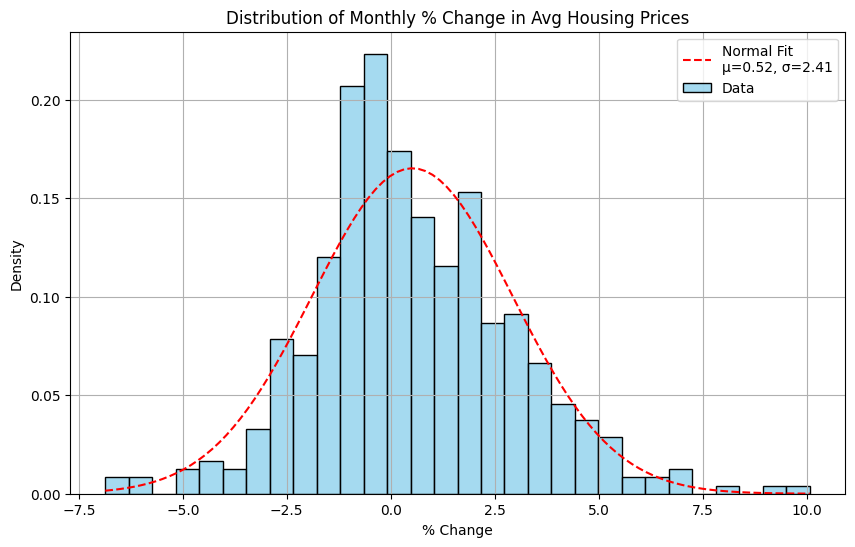

In [39]:
region_avg = housing3.drop(columns="Mon-Yr").mean(axis=1)
percent_diff = region_avg.pct_change().dropna() * 100

# Histogram no overlay sad
# plt.figure(figsize=(10,6))
# sns.histplot(percent_diff, bins=30, kde=False, stat="density", color="skyblue", label="Data")
mu, std = norm.fit(percent_diff)
x = np.linspace(percent_diff.min(), percent_diff.max(), 100)

# Histogram with normal curve overlay plus mean and std dev label
plt.figure(figsize=(10, 6))
sns.histplot(percent_diff, bins=30, stat="density", color="skyblue", label="Data")
plt.plot(x, norm.pdf(x, mu, std), 'r--', label=f'Normal Fit\nμ={mu:.2f}, σ={std:.2f}')
plt.title("Distribution of Monthly % Change in Avg Housing Prices")
plt.xlabel("% Change")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



In [60]:
def create_scatter_plot(city):

    plt.figure(figsize=(14,6))
    sns.scatterplot(data = housing3, x = "Mon-Yr", y = city)


    ax = plt.gca()


    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [79]:
def create_linreg(city):

    plt.figure(figsize=(14,6))
    sns.scatterplot(data = housing3, x = "Mon-Yr", y = city)

    # Adding line fit and linear reg -> This function is meant for CA but can be applied to other cities if needed
    X = np.arange(len(housing3)).reshape(-1, 1)
    Y = housing3[city].values
    model = LinearRegression()
    model.fit(X,Y)
    y_pred = model.predict(X)

    plt.plot(housing3["Mon-Yr"], y_pred, color='red', label='Linear Fit')
    plt.title(f"{city} Housing Price Trend", fontsize=16)
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


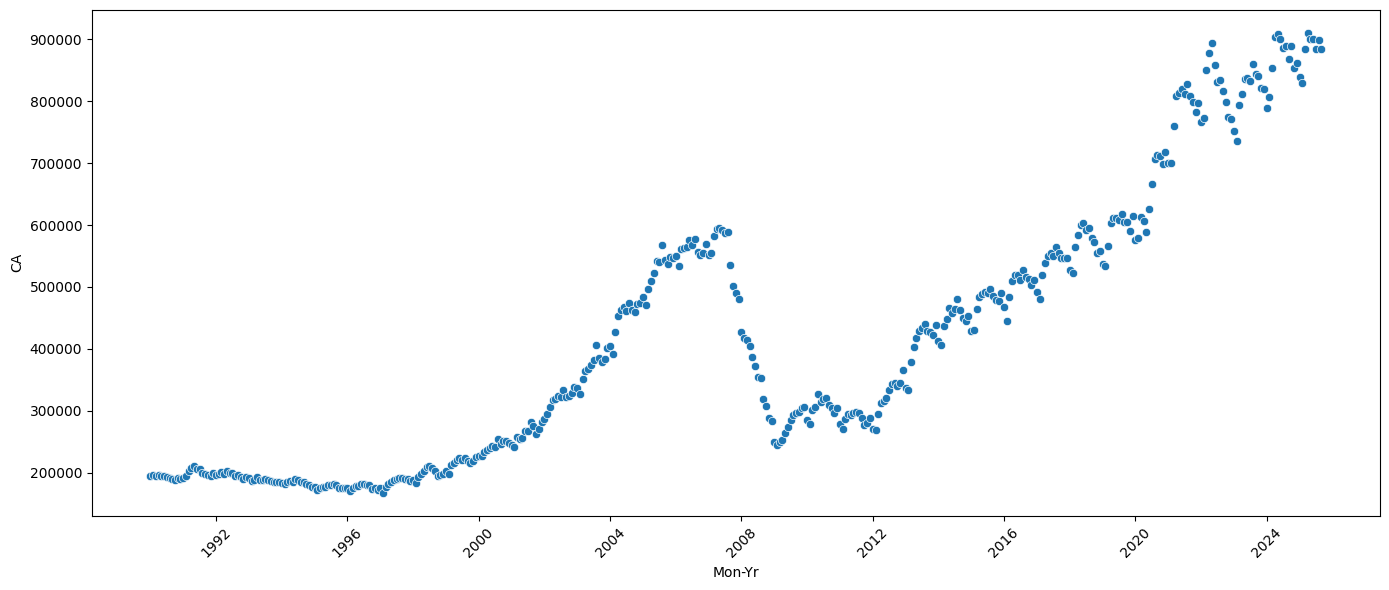

In [67]:
create_scatter_plot('CA')

Descriptive Stats for CA:

In [68]:
CA_stats = housing3['CA'].describe()
print(CA_stats)

print(f"\nMean: ${CA_stats['mean']:.2f}")
print(f"Median: ${housing3['CA'].median():.2f}")
print(f"Standard Deviation: ${CA_stats['std']:.2f}")
print(f"Min: ${CA_stats['min']:.2f}")
print(f"Max: ${CA_stats['max']:.2f}")
print(f"Range: ${CA_stats['max'] - CA_stats['min']:.2f}")


count       429.000000
mean     416540.585082
std      216233.647394
min      167790.000000
25%      209003.000000
50%      364040.000000
75%      554280.000000
max      910160.000000
Name: CA, dtype: float64

Mean: $416540.59
Median: $364040.00
Standard Deviation: $216233.65
Min: $167790.00
Max: $910160.00
Range: $742370.00


Descriptive Stats for LA Metro:

In [69]:
Metro_stats = housing3['LA Metro'].describe()
print(Metro_stats)

print(f"\nMean: ${Metro_stats['mean']:.2f}")
print(f"Median: ${housing3['CA'].median():.2f}")
print(f"Standard Deviation: ${Metro_stats['std']:.2f}")
print(f"Min: ${Metro_stats['min']:.2f}")
print(f"Max: ${Metro_stats['max']:.2f}")
print(f"Range: ${Metro_stats['max'] - Metro_stats['min']:.2f}")

count       429.000000
mean     388924.517483
std      196557.511553
min      163596.000000
25%      211024.000000
50%      334460.000000
75%      515000.000000
max      855000.000000
Name: LA Metro, dtype: float64

Mean: $388924.52
Median: $364040.00
Standard Deviation: $196557.51
Min: $163596.00
Max: $855000.00
Range: $691404.00


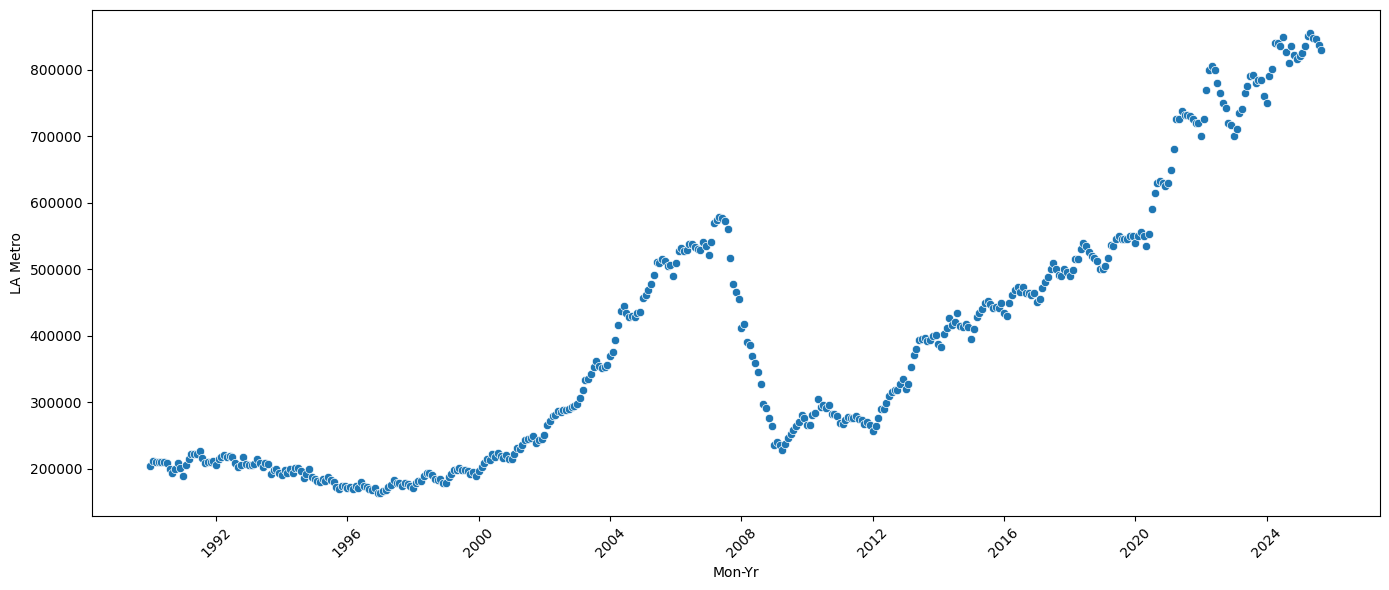

In [70]:
create_scatter_plot('LA Metro')

Descriptive Stats for SoCal:

In [71]:
So_Cally = housing3['SoCal'].describe()
print(So_Cally)

print(f"\nMean: ${So_Cally['mean']:.2f}")
print(f"Median: ${housing3['CA'].median():.2f}")
print(f"Standard Deviation: ${So_Cally['std']:.2f}")
print(f"Min: ${So_Cally['min']:.2f}")
print(f"Max: ${So_Cally['max']:.2f}")
print(f"Range: ${So_Cally['max'] - So_Cally['min']:.2f}")

count       429.000000
mean     362948.398601
std      250143.395889
min           0.000000
25%      100500.000000
50%      330000.000000
75%      520000.000000
max      888000.000000
Name: SoCal, dtype: float64

Mean: $362948.40
Median: $364040.00
Standard Deviation: $250143.40
Min: $0.00
Max: $888000.00
Range: $888000.00


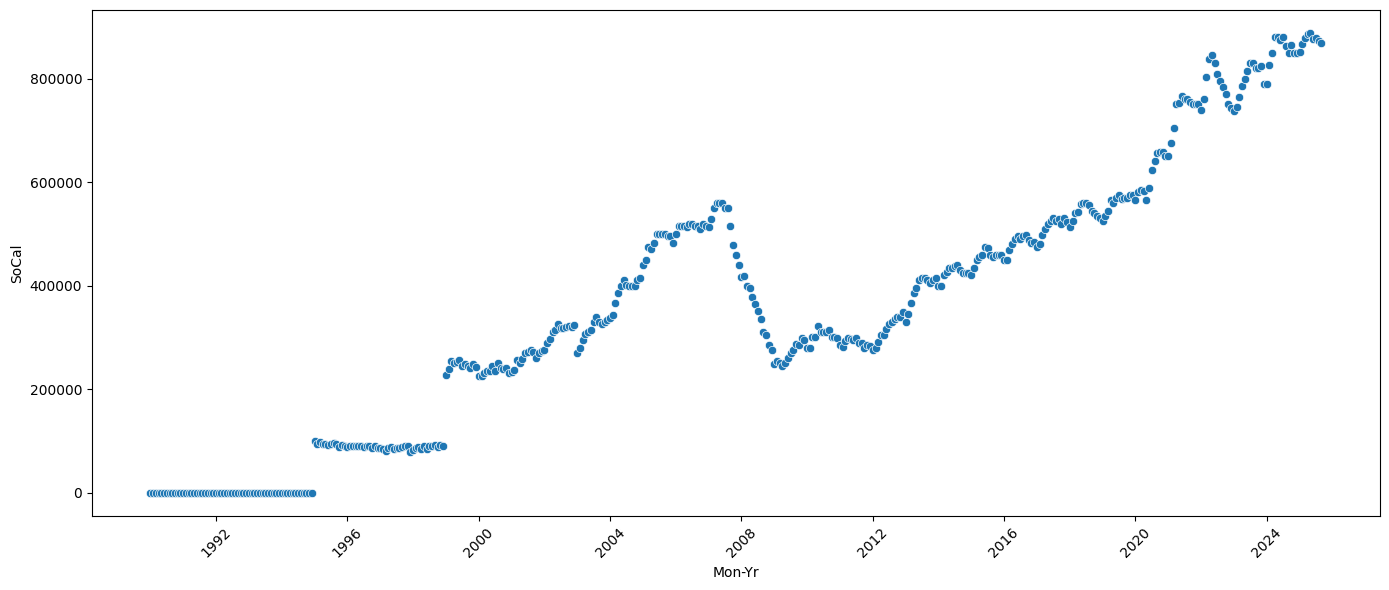

In [72]:
create_scatter_plot('SoCal')


Descriptive Stats for SD:

In [73]:
Best_stats = housing3['San Diego'].describe()
print(Best_stats)

print(f"\nMean: ${Best_stats['mean']:.2f}")
print(f"Median: ${housing3['CA'].median():.2f}")
print(f"Standard Deviation: ${Best_stats['std']:.2f}")
print(f"Min: ${Best_stats['min']:.2f}")
print(f"Max: ${Best_stats['max']:.2f}")
print(f"Range: ${Best_stats['max'] - Best_stats['min']:.2f}")

count    4.290000e+02
mean     4.620935e+05
std      2.474851e+05
min      1.670830e+05
25%      2.155980e+05
50%      4.084830e+05
75%      6.073680e+05
max      1.054180e+06
Name: San Diego, dtype: float64

Mean: $462093.51
Median: $364040.00
Standard Deviation: $247485.14
Min: $167083.00
Max: $1054180.00
Range: $887097.00


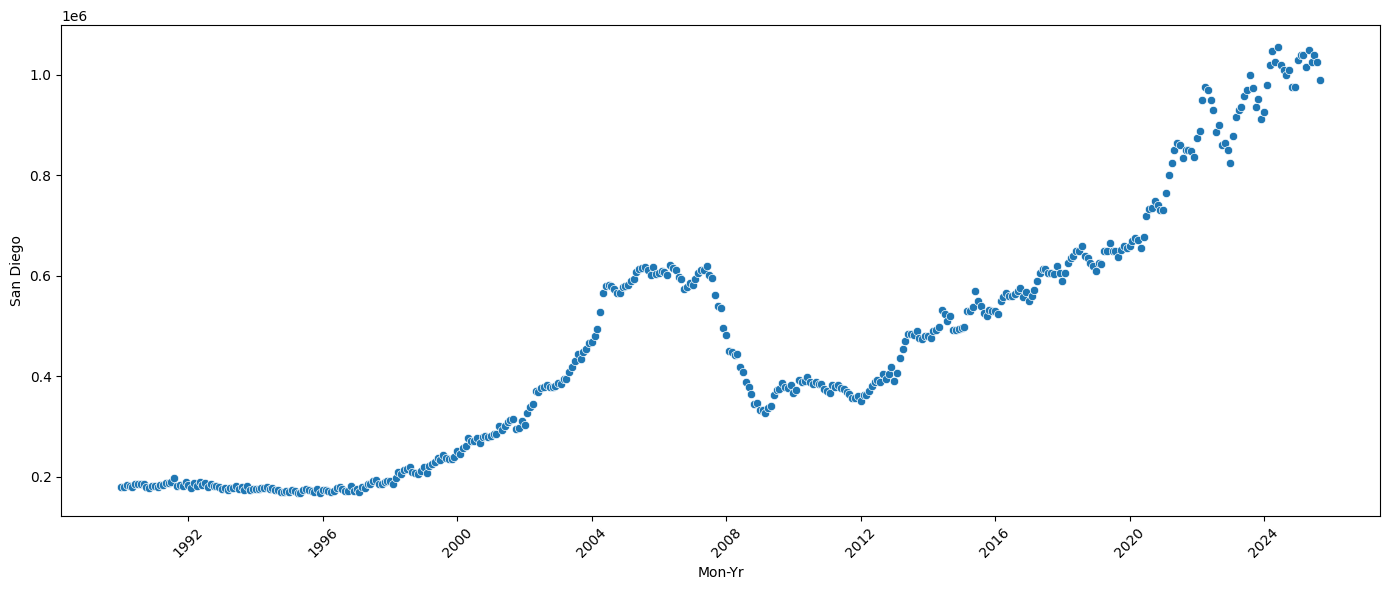

In [74]:
create_scatter_plot("San Diego")

Linear Regression: I originally was going to show linreg plots for all of them, however the results were the exact same line as CA and unclear which was outpacing which, so I decided it would be better to get their performance by getting their slope. Ill focus on error and other underlying factors later

In [83]:
def growth_rate(city):
    X = np.arange(len(housing3)).reshape(-1, 1)
    Y = housing3[city].values
    model = LinearRegression()
    model.fit(X, Y)
    return model.coef_[0]


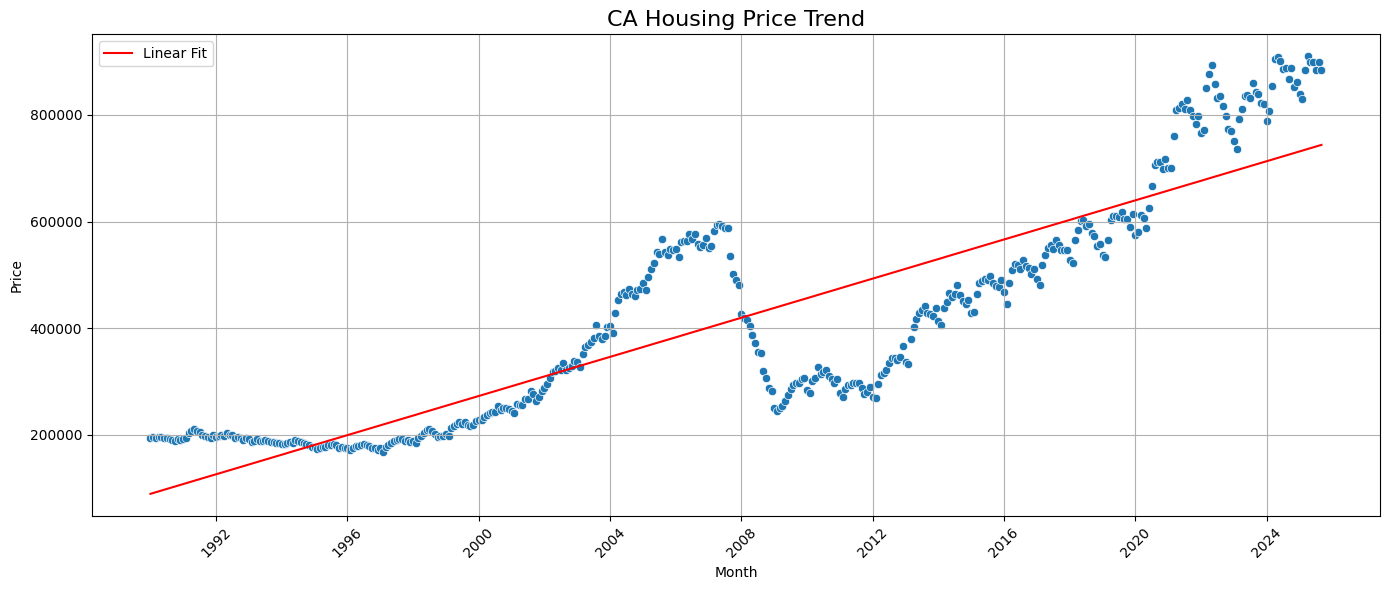

CA: $1529.28/month
LA Metro: $1359.73/month
SoCal: $1872.26/month
San Diego: $1795.39/month


In [86]:
create_linreg('CA')

for region in ['CA', 'LA Metro', 'SoCal', 'San Diego']:
    rate = growth_rate(region)
    print(f"{region}: ${rate:.2f}/month")
